In [82]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"

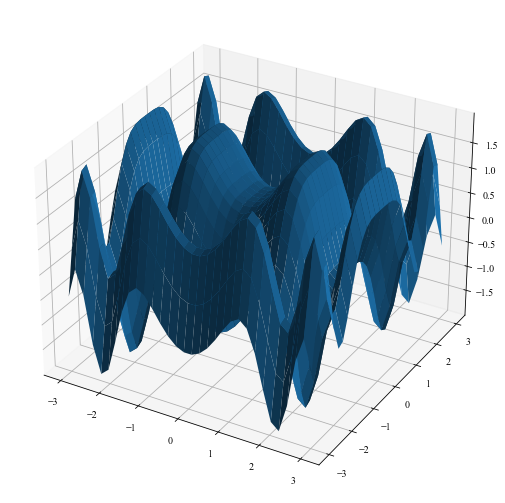

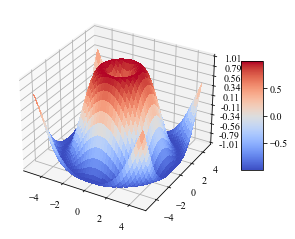

In [83]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [84]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/nilayamkamila/block-chain-intelligent-machine/refs/heads/main/block-chain-machine-learning/block-chain/data/blockchain-kinesis-data-stream-realtime_200.csv")

In [85]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,currencyId,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userIdentity,userFollowers,userFriends,userVerified,userCreditRating,certifiedAuthorityTrusted,tokenTrusted
0,c7217430,9.493863e+06,8.375410e+06,1.154262e+06,4.288372e+06,9.695310e+06,367857,17947c8a-19b1-4f6c-9f9c-55da877dbe88,98219,8162,True,0.165708,False,True
1,d15dcade,1.889487e+06,8.190605e+06,6.132847e+06,7.987346e+06,4.671003e+05,465059,01e8c6bc-6f6c-4ebd-8f76-66c233d40977,75637,8184,False,0.878745,False,False
2,4a25b262,2.364745e+06,5.007885e+06,2.455782e+06,4.214189e+06,2.562839e+06,860033,56c2f38b-6847-406b-887c-142e76f4698f,21482,9966,False,0.251999,False,False
3,d50467c2,6.619379e+06,5.609200e+06,1.882749e+06,9.557797e+06,8.095053e+06,669708,d35ef270-21ed-47a2-9827-5dc7dffdcf8d,55134,2121,False,0.206407,True,False
4,2d9b6d4c,3.834153e+06,4.939559e+06,7.012975e+06,4.192315e+06,6.807952e+06,644470,e69c800a-45e5-4efd-8e87-013274517c28,21887,6285,True,0.073320,False,True


### Dataset Rows & Columns count

In [86]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  14


### Dataset Information

In [87]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   currencyId                 200 non-null    object 
 1   openingValue               200 non-null    float64
 2   closingValue               200 non-null    float64
 3   highestValue               200 non-null    float64
 4   lowestValue                200 non-null    float64
 5   adjClose                   200 non-null    float64
 6   volumeStocks               200 non-null    int64  
 7   userIdentity               200 non-null    object 
 8   userFollowers              200 non-null    int64  
 9   userFriends                200 non-null    int64  
 10  userVerified               200 non-null    bool   
 11  userCreditRating           200 non-null    float64
 12  certifiedAuthorityTrusted  200 non-null    bool   
 13  tokenTrusted               200 non-null    bool   

#### Duplicate Values

In [88]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [89]:
# Missing Values/Null Values Count
df.isnull().sum()

currencyId                   0
openingValue                 0
closingValue                 0
highestValue                 0
lowestValue                  0
adjClose                     0
volumeStocks                 0
userIdentity                 0
userFollowers                0
userFriends                  0
userVerified                 0
userCreditRating             0
certifiedAuthorityTrusted    0
tokenTrusted                 0
dtype: int64

## ***2. Understanding The Variables***

In [90]:
# Dataset Columns
df.columns

Index(['currencyId', 'openingValue', 'closingValue', 'highestValue',
       'lowestValue', 'adjClose', 'volumeStocks', 'userIdentity',
       'userFollowers', 'userFriends', 'userVerified', 'userCreditRating',
       'certifiedAuthorityTrusted', 'tokenTrusted'],
      dtype='object')

In [91]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,currencyId,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userIdentity,userFollowers,userFriends,userVerified,userCreditRating,certifiedAuthorityTrusted,tokenTrusted
count,200,200.00,200.00,200.00,200.00,200.00,200.00,200,200.00,200.00,200,200.00,200,200
unique,200,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN,NaN,2,NaN,2,2
top,35417094,NaN,NaN,NaN,NaN,NaN,NaN,c295dbf4-0e11-4c3b-93f2-a6523e5fdf5d,NaN,NaN,False,NaN,True,False
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,105,NaN,101,104
mean,NaN,4782295.53,5043955.76,5385116.71,4658104.71,4881559.93,520862.87,NaN,50107.05,5150.02,NaN,0.47,NaN,NaN
std,NaN,2978976.58,2813730.66,2809726.08,2845385.71,2837751.05,287555.93,NaN,28784.35,2993.34,NaN,0.30,NaN,NaN
min,NaN,9250.81,54643.51,8699.93,2079.80,37987.82,6440.00,NaN,45.00,35.00,NaN,0.01,NaN,NaN
25%,NaN,2151754.01,2824280.15,2982234.38,2368058.42,2556744.91,266749.75,NaN,24949.75,2583.75,NaN,0.22,NaN,NaN
50%,NaN,4509704.10,4901613.61,5717265.33,4315185.99,4795677.98,543638.50,NaN,48545.50,5208.00,NaN,0.44,NaN,NaN
75%,NaN,7420051.58,7647546.34,7809674.14,7072942.85,7158568.11,756858.50,NaN,76579.50,7642.00,NaN,0.74,NaN,NaN


### Check Unique Values for each variable.

In [92]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in currencyId is 200
No. of unique values in openingValue is 200
No. of unique values in closingValue is 200
No. of unique values in highestValue is 200
No. of unique values in lowestValue is 200
No. of unique values in adjClose is 200
No. of unique values in volumeStocks is 200
No. of unique values in userIdentity is 200
No. of unique values in userFollowers is 200
No. of unique values in userFriends is 199
No. of unique values in userVerified is 2
No. of unique values in userCreditRating is 200
No. of unique values in certifiedAuthorityTrusted is 2
No. of unique values in tokenTrusted is 2


## ***3. Data Wrangling***

### Data Wrangling Code

In [93]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [94]:
# New updated dataset
data.head()

,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userIdentity,userFollowers,userFriends,userVerified,userCreditRating,certifiedAuthorityTrusted,tokenTrusted
0,9.493863e+06,8.375410e+06,1.154262e+06,4.288372e+06,9.695310e+06,367857,17947c8a-19b1-4f6c-9f9c-55da877dbe88,98219,8162,True,0.165708,False,True
1,1.889487e+06,8.190605e+06,6.132847e+06,7.987346e+06,4.671003e+05,465059,01e8c6bc-6f6c-4ebd-8f76-66c233d40977,75637,8184,False,0.878745,False,False
2,2.364745e+06,5.007885e+06,2.455782e+06,4.214189e+06,2.562839e+06,860033,56c2f38b-6847-406b-887c-142e76f4698f,21482,9966,False,0.251999,False,False
3,6.619379e+06,5.609200e+06,1.882749e+06,9.557797e+06,8.095053e+06,669708,d35ef270-21ed-47a2-9827-5dc7dffdcf8d,55134,2121,False,0.206407,True,False
4,3.834153e+06,4.939559e+06,7.012975e+06,4.192315e+06,6.807952e+06,644470,e69c800a-45e5-4efd-8e87-013274517c28,21887,6285,True,0.073320,False,True


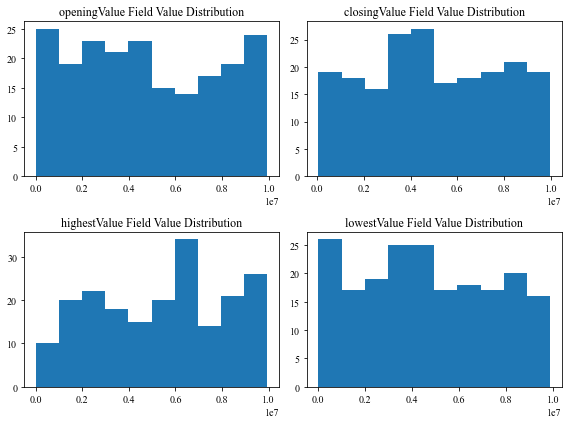

In [95]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
#plt.suptitle('Distribution of Block Chain Crypto Currency Entity Fields Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['openingValue'])
plt.title('openingValue Field Value Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['closingValue'])
plt.title('closingValue Field Value Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['highestValue'])
plt.title('highestValue Field Value Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['lowestValue'])
plt.title('lowestValue Field Value Distribution')


# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 10.svg', dpi=600)
plt.show()

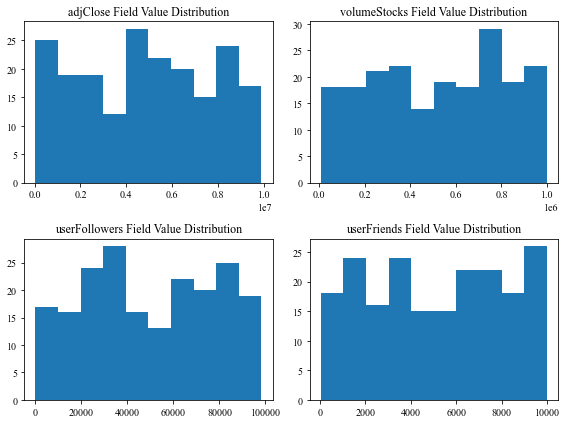

In [96]:
# Chart - 2 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
#plt.suptitle('Distribution of Block Chain Crypto Currency Entity Fields Measurements', fontsize=14)

plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['adjClose'])
plt.title('adjClose Field Value Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['volumeStocks'])
plt.title('volumeStocks Field Value Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['userFollowers'])
plt.title('userFollowers Field Value Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['userFriends'])
plt.title('userFriends Field Value Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 11.svg', dpi=600)
plt.show()

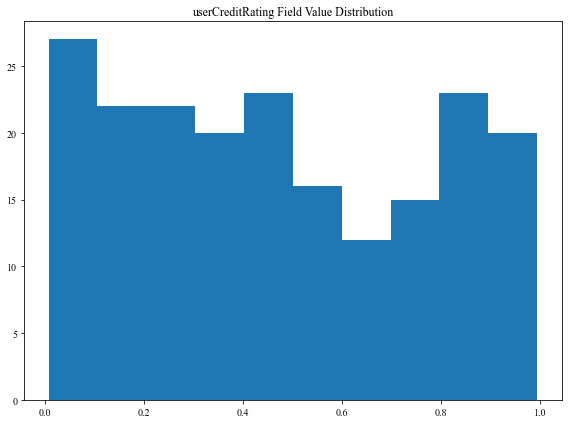

In [97]:
# Chart - 3 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
#plt.suptitle('Distribution of Block Chain Crypto Currency Entity Fields Measurements', fontsize=14)

#plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['userCreditRating'])
plt.title('userCreditRating Field Value Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 12.svg', dpi=600)
plt.show()

#### Chart - 2 : openingValue vs closingValue

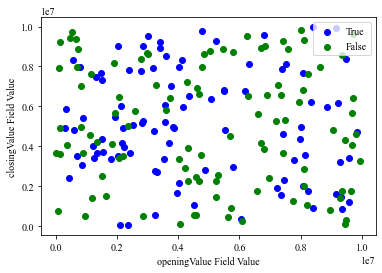

In [98]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for opening value vs closing value for each elements.
# Define colors for each species and the corresponding species labels.
colors = ['blue', 'green']
species = [True, False]
data.head()
for i in range(2):
    # Select data for the current species.
    x = data[data['tokenTrusted'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['openingValue'], x['closingValue'], c=colors[i], label=species[i])
    #plt.scatter(x['highestValue'],x['lowestValue'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('openingValue Field Value')
plt.ylabel('closingValue Field Value')

# Add a legend to identify species based on colors.
plt.legend(loc="upper right")
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 14.svg', dpi=600)
# Display the scatter plot.
plt.show()

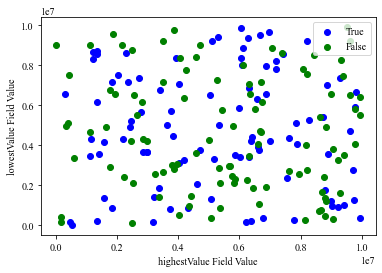

In [99]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for opening value vs closing value for each elements.
# Define colors for each species and the corresponding species labels.
colors = ['blue', 'green']
species = [True, False]
data.head()
for i in range(2):
    # Select data for the current species.
    x = data[data['tokenTrusted'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    #plt.scatter(x['openingValue'], x['closingValue'], c=colors[i], label=species[i])
    plt.scatter(x['highestValue'],x['lowestValue'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('highestValue Field Value')
plt.ylabel('lowestValue Field Value')

# Add a legend to identify species based on colors.
plt.legend(loc="upper right")
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 15.svg', dpi=600)

# Display the scatter plot.
plt.show()

#### Chart - 3 : adjClose vs volumeStocks Width

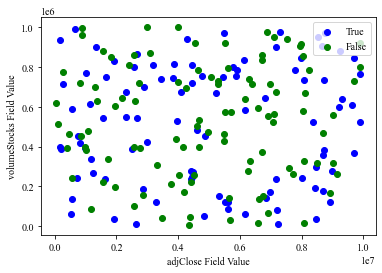

In [100]:
colors = ['blue', 'green']
species = [True, False]
data.head()
for i in range(2):
    # Select data for the current species.
    x = data[data['tokenTrusted'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['adjClose'], x['volumeStocks'], c=colors[i], label=species[i])
    #plt.scatter(x['highestValue'],x['lowestValue'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('adjClose Field Value')
plt.ylabel('volumeStocks Field Value')

# Add a legend to identify species based on colors.
plt.legend(loc="upper right")
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 16.svg', dpi=600)

# Display the scatter plot.
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length

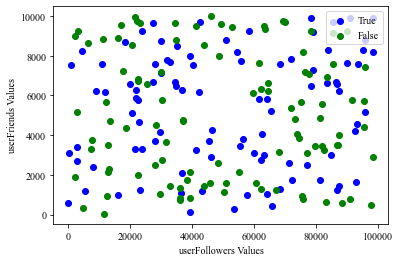

In [101]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
colors = ['blue', 'green']
species = [True, False]
data.head()
for i in range(2):
    # Select data for the current species.
    x = data[data['tokenTrusted'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['userFollowers'], x['userFriends'], c=colors[i], label=species[i])
    #plt.scatter(x['highestValue'],x['lowestValue'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('userFollowers Values')
plt.ylabel('userFriends Values')

# Add a legend to identify species based on colors.
plt.legend(loc="upper right")
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 17.svg', dpi=600)
# Display the scatter plot.
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width

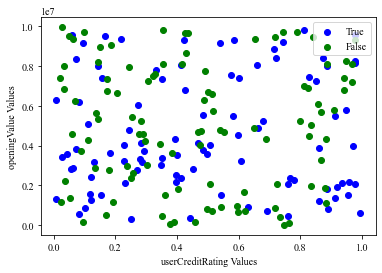

In [102]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
colors = ['blue', 'green']
species = [True, False]
data.head()
for i in range(2):
    # Select data for the current species.
    x = data[data['tokenTrusted'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['userCreditRating'], x['openingValue'], c=colors[i], label=species[i])
    #plt.scatter(x['highestValue'],x['lowestValue'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('userCreditRating Values')
plt.ylabel('openingValue Values')

# Add a legend to identify species based on colors.
plt.legend()
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 13.svg', dpi=600)
# Display the scatter plot.
plt.show()

#### Chart - 6 : Correlation Heatmap

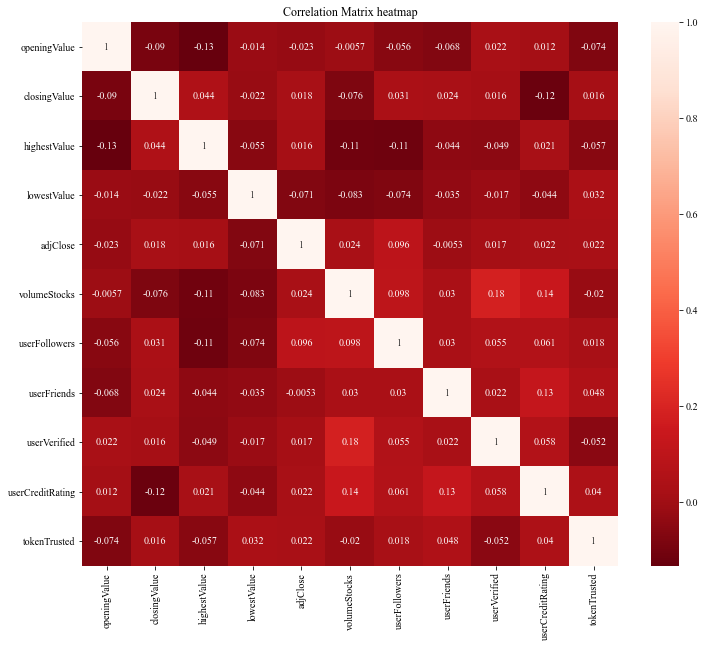

In [103]:
# Correlation Heatmap Visualization Code
data = data.drop(columns=['certifiedAuthorityTrusted'], axis=1)
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')
plt.savefig('/Users/nilayamkamila/ALL/Ph.D_III/Ph.D_ResearchScholar_SSU/Trustworthiness4.0/Trustworthiness3.0-Figure 18.svg', dpi=600)

# Display Chart
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [55]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['tokenTrusted'] = le.fit_transform(data['tokenTrusted'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['tokenTrusted'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2
data.head()

Encoded Species Values:
[1 0]


,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userIdentity,userFollowers,userFriends,userVerified,userCreditRating,tokenTrusted
0,9.493863e+06,8.375410e+06,1.154262e+06,4.288372e+06,9.695310e+06,367857,17947c8a-19b1-4f6c-9f9c-55da877dbe88,98219,8162,True,0.165708,1
1,1.889487e+06,8.190605e+06,6.132847e+06,7.987346e+06,4.671003e+05,465059,01e8c6bc-6f6c-4ebd-8f76-66c233d40977,75637,8184,False,0.878745,0
2,2.364745e+06,5.007885e+06,2.455782e+06,4.214189e+06,2.562839e+06,860033,56c2f38b-6847-406b-887c-142e76f4698f,21482,9966,False,0.251999,0
3,6.619379e+06,5.609200e+06,1.882749e+06,9.557797e+06,8.095053e+06,669708,d35ef270-21ed-47a2-9827-5dc7dffdcf8d,55134,2121,False,0.206407,0
4,3.834153e+06,4.939559e+06,7.012975e+06,4.192315e+06,6.807952e+06,644470,e69c800a-45e5-4efd-8e87-013274517c28,21887,6285,True,0.073320,1


### 2. Data Scaling

In [58]:
# Defining the X and y
x=data.drop(columns=['userIdentity','tokenTrusted'], axis=1)
y=data['tokenTrusted']
x.head()
#y.head()

0    1
1    0
2    0
3    0
4    1
Name: tokenTrusted, dtype: int64

### 3. Data Splitting

In [59]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)